Diabetes is a chronic disease that occurs either when the pancreas does not produce enough insulin or when the body cannot effectively use the insulin it produces. Insulin is a hormone that regulates blood glucose.

As a data scientist working in the field of diabetes management and diagnosis, the ultimate goal is to derive meaningful and actionable insights from patient-level data.

You can help healthcare providers by developing predictive models to identify individuals at risk of developing diabetes, enabling early intervention and prevention strategies. Additionally, by analyzing patient data, you can create personalized treatment plans that optimize medication, diet, and exercise regimens for better patient outcomes.


#**About the dataset**

This dataset is downloaded from Kaggle. It is originally from the National Institute of Diabetes and Digestive and Kidney Diseases.


In particular, all patients here are females
at least 21 years old.

#Column Profiling

1.	Age: This column is an integer containing information on age of all the patients.
2.	BloodPressure: This column is an integer and provides the values of blood pressure of all the patients.
3.	BMI: This column is a floating-point number (float) and express the body mass index of the patients.
4.	DiabetesPedigreeFunction: This column is a float and express the DiabetesPedigreeFunction (a function that scores the likelihood of diabetes based on family history, with a realistic range of 0.08 to 2.42.)
5.	Glucose: This column is an integer and provides the blood glucose level of patients.
6.	Insulin: This column is an integer and express the insulin level in blood.
7.	Outcome: This column expresses the final result 1 is Yes and 0 is No
8.	Pregnancies: This column is an integer and express the number of pregnancies
9.	SkinThickness: This column in an integer and express the thickness of the skin.


#Problem statement
1. From the data of each patient, we try to diagnose if the patient is diabetic or not.

2. To find which variables are significance in prediction of diabetes.

**Import necessary libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Load the dataset**

In [ ]:
df=pd.read_csv("diabetes.csv")

##Summarizing the Dataset

In [ ]:
#Check the column names
print(df.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [ ]:
#check numberr of columns and rows in dataset
df.shape

(768, 9)

In [ ]:
#Summarize the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
#check the dispersion and shape of a dataset
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


##Performing EDA

In [ ]:
#Check for null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There are no null values in dataset.

In [ ]:
#chack for duplicate
df.duplicated() # this code will check if the entire row has been repeated anywhere in the dataframe.

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool

In [ ]:
#check for total duplicate rows in dataset.
df.duplicated().sum()

0

In [ ]:
df[df.duplicated()].shape

(0, 9)

As the column name "DiabetesPedigreeFunction" is too long, I rename the column to DPF


In [ ]:
df.rename({'DiabetesPedigreeFunction':'DPF'},axis=1,inplace=True) #Rename the column "DiabetesPedigreeFunction"
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In all the columns, parameter value is mentioned as zeero (0). Therefore, to check the number of zeero, I used the following codes.

In [ ]:
zero_count=df.eq(0).sum()
print(zero_count)

Pregnancies      111
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
DPF                0
Age                0
Outcome          500
dtype: int64


<Axes: >

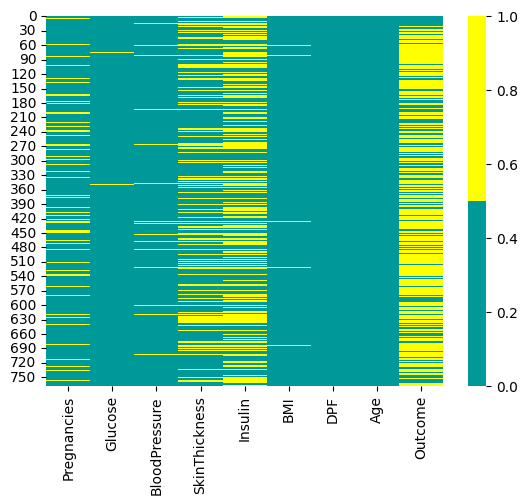

In [ ]:
# Visualize the 0 in heatmap
mask=df==0 # Create a binary mask for '0' values
colours = ['#009999','#ffff00'] #assign the colours
sns.heatmap(mask,cmap=sns.color_palette(colours)) # Show the heatmap

#Outlier detection

I used boxplot to detect the outliers.

{'whiskers': [<matplotlib.lines.Line2D at 0x7c80b4646080>,
 'caps': [<matplotlib.lines.Line2D at 0x7c80b46469e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c80b46463b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7c80b4646f20>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c80b46471c0>],
 'means': []}

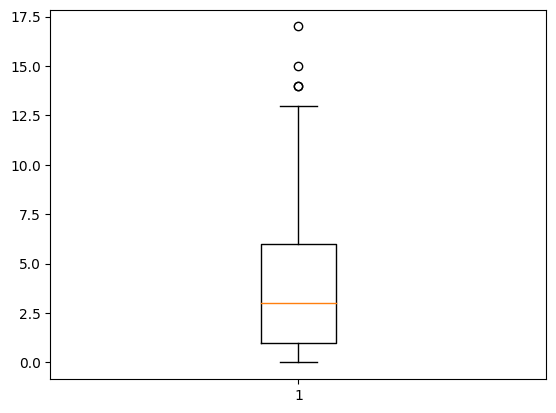

In [ ]:
plt.boxplot(df.Pregnancies)#Plot boxplot for pregnancies

{'whiskers': [<matplotlib.lines.Line2D at 0x7c80b44bceb0>,
 'caps': [<matplotlib.lines.Line2D at 0x7c80b44bd3f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c80b44bcdc0>],
 'medians': [<matplotlib.lines.Line2D at 0x7c80b44bd960>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c80b44bdc00>],
 'means': []}

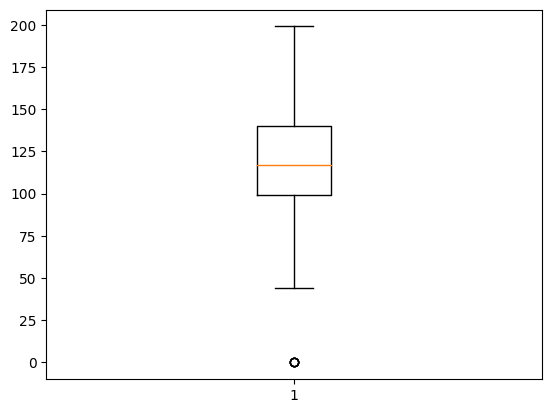

In [ ]:
plt.boxplot(df.Glucose)

{'whiskers': [<matplotlib.lines.Line2D at 0x7c80b454c250>,
 'caps': [<matplotlib.lines.Line2D at 0x7c80b454c790>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c80b451bf70>],
 'medians': [<matplotlib.lines.Line2D at 0x7c80b454ccd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c80b454cf70>],
 'means': []}

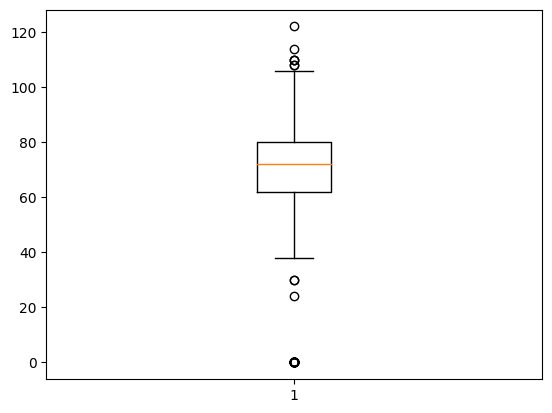

In [ ]:
plt.boxplot(df.BloodPressure)

{'whiskers': [<matplotlib.lines.Line2D at 0x7c80b459e4d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7c80b459ea10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c80b459e230>],
 'medians': [<matplotlib.lines.Line2D at 0x7c80b459ef50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c80b459f1f0>],
 'means': []}

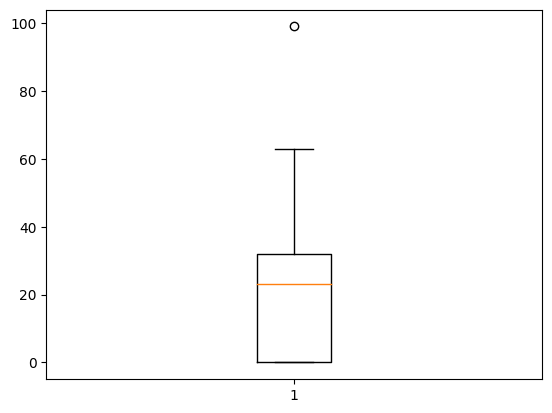

In [ ]:
plt.boxplot(df.SkinThickness)

{'whiskers': [<matplotlib.lines.Line2D at 0x7c80b4420430>,
 'caps': [<matplotlib.lines.Line2D at 0x7c80b4420970>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c80b44202b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7c80b4420eb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c80b4421150>],
 'means': []}

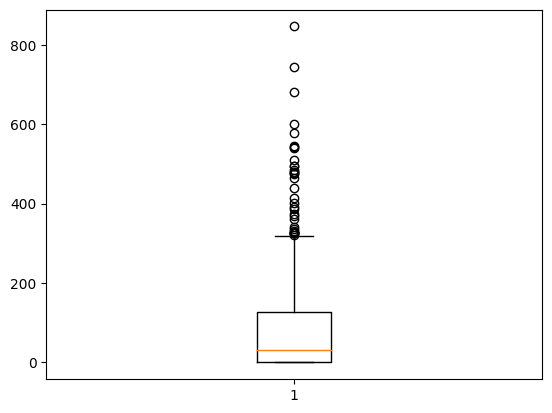

In [ ]:
plt.boxplot(df.Insulin)

{'whiskers': [<matplotlib.lines.Line2D at 0x7c80b44818a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7c80b4481de0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c80b4481600>],
 'medians': [<matplotlib.lines.Line2D at 0x7c80b4482320>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c80b4482500>],
 'means': []}

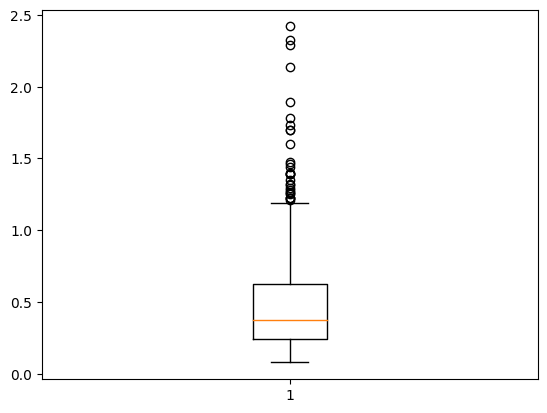

In [ ]:
plt.boxplot(df.DPF)

{'whiskers': [<matplotlib.lines.Line2D at 0x7c80b42d3610>,
 'caps': [<matplotlib.lines.Line2D at 0x7c80b42d3b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c80b42d3490>],
 'medians': [<matplotlib.lines.Line2D at 0x7c80b430c0d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c80b430c370>],
 'means': []}

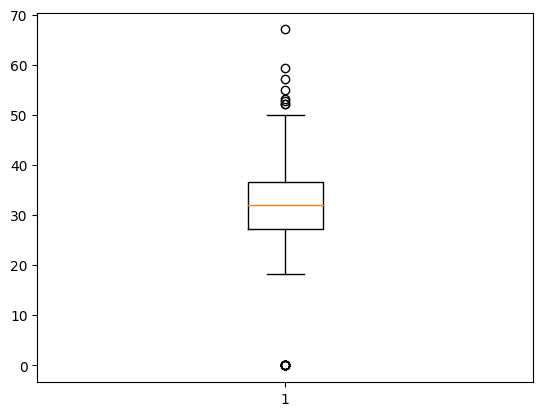

In [ ]:
plt.boxplot(df.BMI)

Explore correlations, patterns, and relationships among features

In [ ]:
corelation_preg_glucose=df['Pregnancies'].corr(df['Glucose'])
print(corelation_preg_glucose)

0.12945867149927245


Text(0, 0.5, 'Pregnancies')

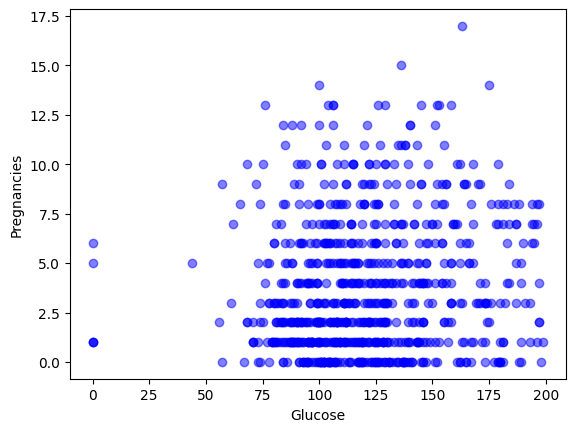

In [ ]:
# Plot the scatterplot for pregnancies and glucose
plt.scatter(df['Glucose'], df['Pregnancies'], color='blue', alpha=0.5)
plt.xlabel('Glucose')
plt.ylabel('Pregnancies')

0.15258958656866448


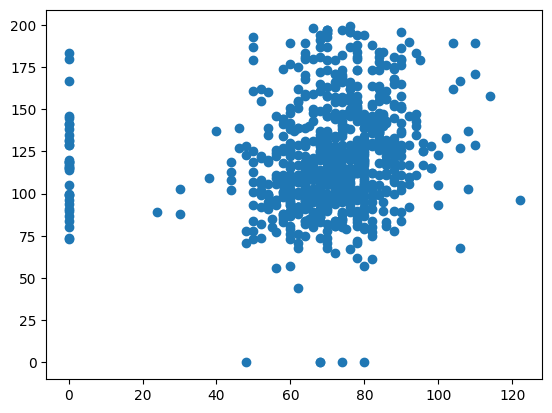

In [ ]:
corr_bp_glucose=df['BloodPressure'].corr(df['Glucose'])
print(corr_bp_glucose)
plt.scatter(df['BloodPressure'], df['Glucose'])

0.33135710992020934


Text(0, 0.5, 'Glucose')

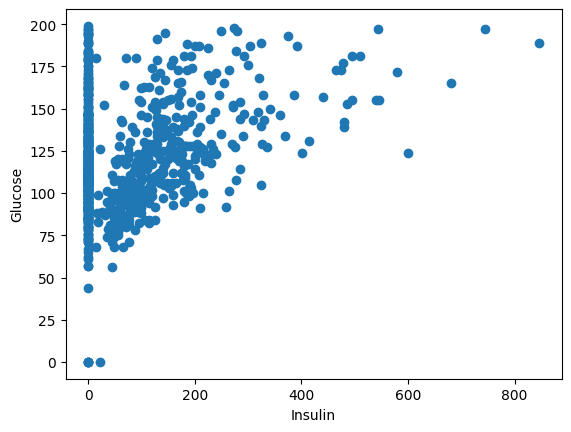

In [ ]:
corr_ins_glucose=df['Insulin'].corr(df['Glucose'])
print(corr_ins_glucose)
plt.scatter(df['Insulin'], df['Glucose'])
plt.xlabel('Insulin')
plt.ylabel('Glucose')

0.2818052888499106


Text(0, 0.5, 'BloodPressure')

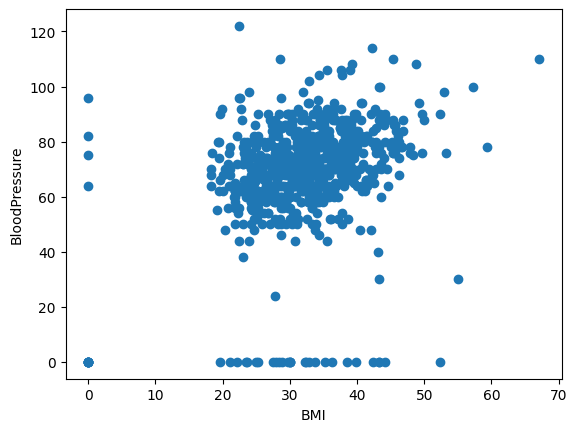

In [ ]:
corr_BMI_bp=df['BMI'].corr(df['BloodPressure'])
print(corr_BMI_bp)
plt.scatter(df['BMI'], df['BloodPressure'])
plt.xlabel('BMI')
plt.ylabel('BloodPressure')

0.22107106945898294


Text(0, 0.5, 'Glucose')

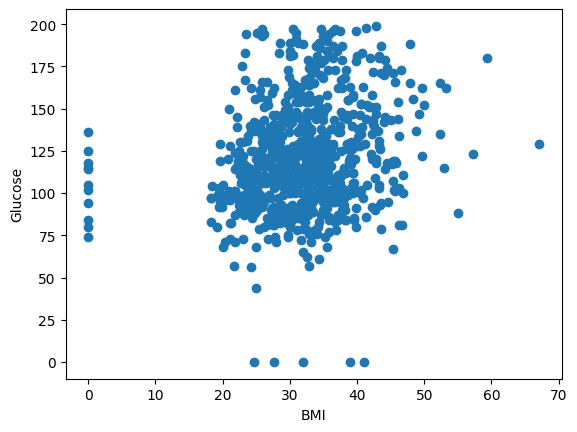

In [ ]:
corr_BMI_glucose=df['BMI'].corr(df['Glucose'])
print(corr_BMI_glucose)
plt.scatter(df['BMI'], df['Glucose'])
plt.xlabel('BMI')
plt.ylabel('Glucose')

0.23952794642136366


Text(0, 0.5, 'BloodPressure')

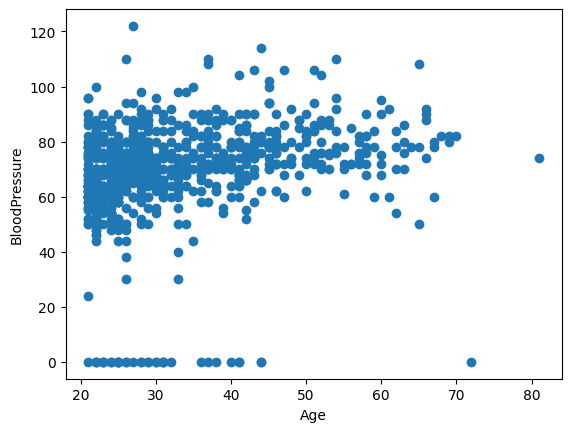

In [ ]:
corr_age_bp=df['Age'].corr(df['BloodPressure'])
print(corr_age_bp)
plt.scatter(df['Age'], df['BloodPressure'])
plt.xlabel('Age')
plt.ylabel('BloodPressure')

-0.04216295473537674


Text(0, 0.5, 'Insulin')

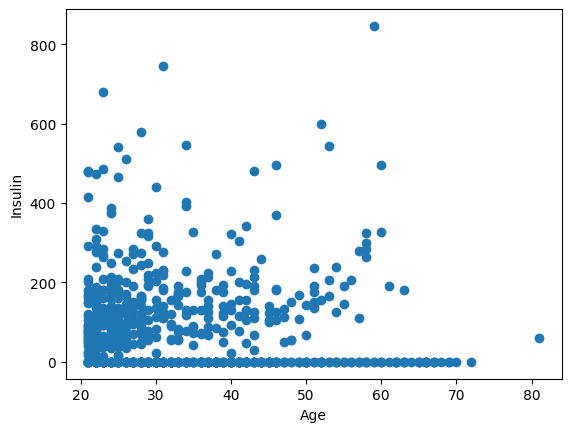

In [ ]:
corr_age_insulin=df['Age'].corr(df['Insulin'])
print(corr_age_insulin)
plt.scatter(df['Age'], df['Insulin'])
plt.xlabel('Age')
plt.ylabel('Insulin')

-0.11397026236774165


Text(0, 0.5, 'SkinThickness')

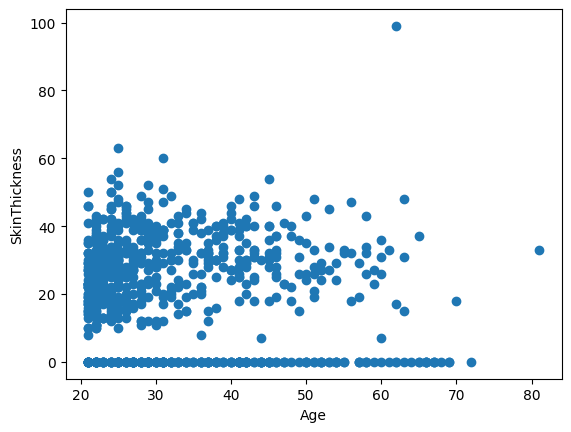

In [ ]:
corr_age_skin=df['Age'].corr(df['SkinThickness'])
print(corr_age_skin)
plt.scatter(df['Age'], df['SkinThickness'])
plt.xlabel('Age')
plt.ylabel('SkinThickness')

The corelatioin value for these parameters is between 0.1 to 0.2 which shows that there is negligible corelation among these parameters.

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#Association between different parameters and occurence of diabetes

Pregnancies v/s diabetese

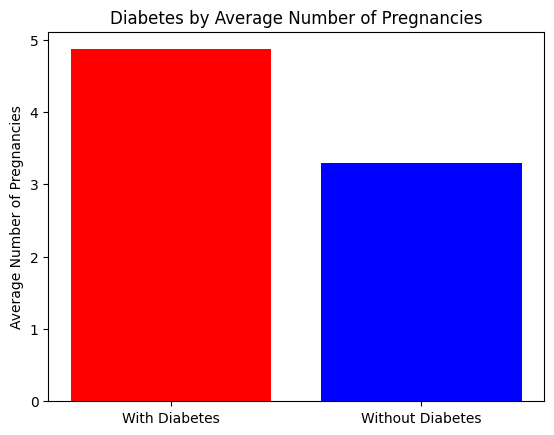

In [ ]:
# Calculate the mean number of pregnancies for those with and without diabetes
mean_pregnancies_with_diabetes = df[df['Outcome'] == 1]['Pregnancies'].mean()
mean_pregnancies_without_diabetes = df[df['Outcome'] == 0]['Pregnancies'].mean()

# Visualize the data
means_preg = [mean_pregnancies_with_diabetes, mean_pregnancies_without_diabetes]
labels = ['With Diabetes', 'Without Diabetes']

plt.bar(labels, means_preg, color=['red', 'blue'])
plt.ylabel('Average Number of Pregnancies')
plt.title('Diabetes by Average Number of Pregnancies')
plt.show()

We can observe for the above chert that the occurrence of diabetes is associated with number of pregnancies. The patient with high number of pregnancies are more likely to have diagnosis of diabetes.

Glucose level v/s diabetes

141.25746268656715
109.98


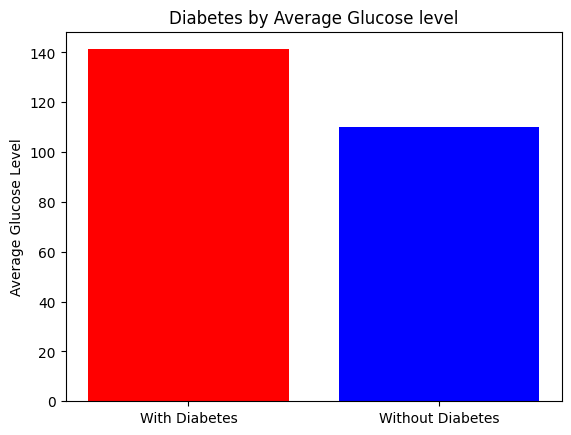

In [ ]:
# Calculate the mean glucose level for those with and without diabetes
mean_glucose_with_diabetes = df[df['Outcome'] == 1]['Glucose'].mean()
mean_glucose_without_diabetes = df[df['Outcome'] == 0]['Glucose'].mean()
print(mean_glucose_with_diabetes)
print(mean_glucose_without_diabetes)

# Visualize the data
means_glu = [mean_glucose_with_diabetes, mean_glucose_without_diabetes]
labels = ['With Diabetes', 'Without Diabetes']

plt.bar(labels, means_glu, color=['red', 'blue'])
plt.ylabel('Average Glucose Level')
plt.title('Diabetes by Average Glucose level')
plt.show()


It can be observed from the above data that the patient with high average glucose level had more chances of being diagnosed with diabetes.

BloodPressure v/s diabetes

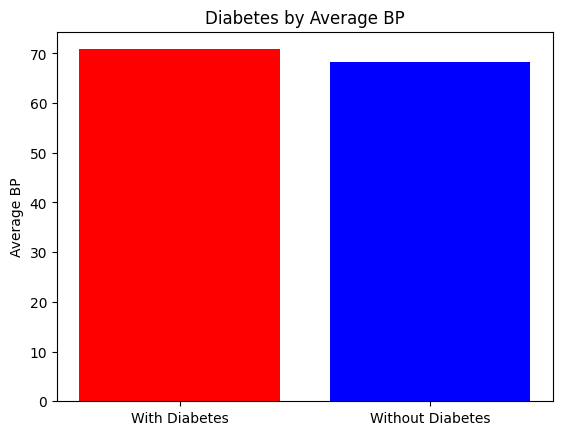

In [ ]:
# Calculate the mean PB for patients with and without diabetes
mean_BP_with_diabetes=df[df['Outcome']==1]['BloodPressure'].mean()
mean_BP_without_diabetes=df[df['Outcome']==0]['BloodPressure'].mean()

# Visualize the data
means_BP=[mean_BP_with_diabetes, mean_BP_without_diabetes]
labels = ['With Diabetes', 'Without Diabetes']

plt.bar(labels, means_BP, color=['red', 'blue'])
plt.ylabel('Average BP')
plt.title('Diabetes by Average BP')
plt.show()

As we can observe from above outcome, there is no significant difference between mean PB of the patients with and without diabetes.

BMI v/s diabetes

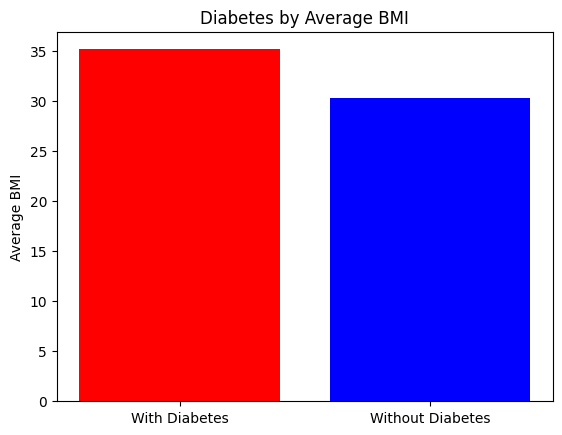

In [ ]:
# Calculate the mean BMI of patients with or without diabetes
mean_BMI_with_diabetes=df[df['Outcome']==1]['BMI'].mean()
mean_BMI_without_diabetes=df[df['Outcome']==0]['BMI'].mean()

# Visualize the data
means_BMI=[mean_BMI_with_diabetes, mean_BMI_without_diabetes]
labels = ['With Diabetes', 'Without Diabetes']

plt.bar(labels, means_BMI, color=['red', 'blue'])
plt.ylabel('Average BMI')
plt.title('Diabetes by Average BMI')
plt.show()

The above chart shows that the average BMI of the patients with diabetes is higher than the patients without diabetes.

DPF v/s diabetes

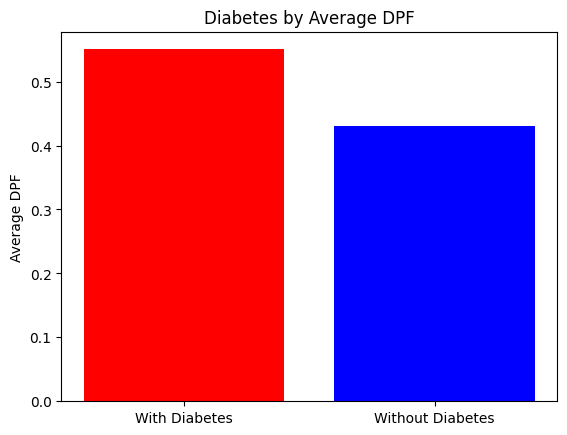

In [ ]:
# Calculate the mean DPF of patients with and wothout diabetes
mean_DPF_with_diabetes=df[df['Outcome']==1]['DPF'].mean()
mean_DPF_without_diabetes=df[df['Outcome']==0]['DPF'].mean()

# Visualize the data
means_DPF=[mean_DPF_with_diabetes, mean_DPF_without_diabetes]
labels = ['With Diabetes', 'Without Diabetes']

plt.bar(labels, means_DPF, color=['red', 'blue'])
plt.ylabel('Average DPF')

plt.title('Diabetes by Average DPF')
plt.show()

The patient with diabetes has higher average DPF.

Age v/s diabetes

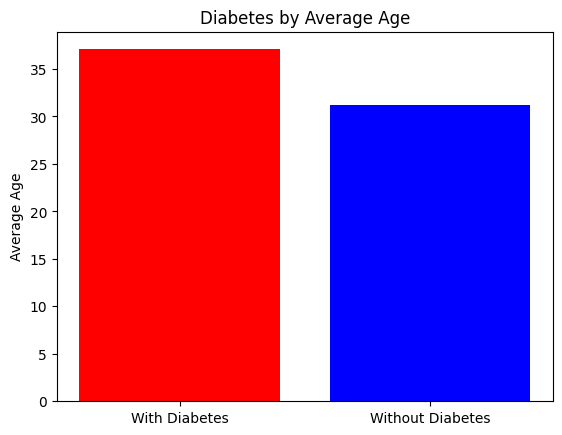

In [ ]:
# Calculate the mean age of patients with or without diabetes
mean_Age_with_diabetes=df[df['Outcome']==1]['Age'].mean()
mean_Age_without_diabetes=df[df['Outcome']==0]['Age'].mean()

# Visualize the data
means_Age=[mean_Age_with_diabetes, mean_Age_without_diabetes]
labels = ['With Diabetes', 'Without Diabetes']

plt.bar(labels, means_Age, color=['red', 'blue'])
plt.ylabel('Average Age')
plt.title('Diabetes by Average Age')
plt.show()

The patient with diabetes has higher average age as compared to the patient without diabetes.